In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-potability/water_potability.csv


In [2]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
dataf = pd.read_csv('../input/water-potability/water_potability.csv')

In [4]:
dataf.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
dataf.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
dataf.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
X = dataf.drop('Potability',axis=1)
y = dataf['Potability']
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [11]:
X_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1555,7.033945,246.622871,15428.450916,7.570769,305.616422,516.217847,17.526819,91.602794,3.931731
1690,7.643578,209.860844,21885.503784,9.529228,NaN,337.632173,8.863614,63.646921,3.762163
1434,7.322502,196.104298,19534.421648,6.661157,297.841381,418.075511,17.161768,69.467359,2.981649
98,7.205559,120.327615,24627.867560,6.202469,289.768697,418.433290,13.643147,63.733732,3.710053
1592,5.772770,186.060603,26693.761607,5.808580,333.073364,312.869364,12.376272,32.761161,4.154685


In [12]:
X_train.isnull().sum()

ph                 348
Hardness             0
Solids               0
Chloramines          0
Sulfate            558
Conductivity         0
Organic_carbon       0
Trihalomethanes    116
Turbidity            0
dtype: int64

In [13]:
X_train.skew()

ph                 0.096116
Hardness          -0.038269
Solids             0.588480
Chloramines        0.074755
Sulfate           -0.048132
Conductivity       0.299285
Organic_carbon    -0.083889
Trihalomethanes   -0.109794
Turbidity         -0.014483
dtype: float64

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>]], dtype=object)

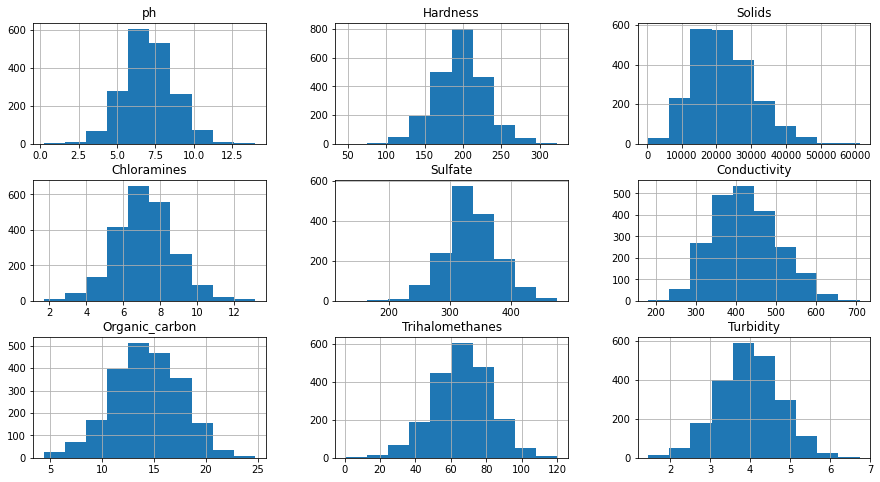

In [14]:
X_train.hist(figsize=(15,8))

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [16]:
print(type(X_train))

<class 'numpy.ndarray'>


In [17]:
x_train = pd.DataFrame(X_train)
x_test = pd.DataFrame(X_test)
x_train.head()


,0,1,2,3,4,5,6,7,8
0,7.033945,246.622871,15428.450916,7.570769,305.616422,516.217847,17.526819,91.602794,3.931731
1,7.643578,209.860844,21885.503784,9.529228,332.805850,337.632173,8.863614,63.646921,3.762163
2,7.322502,196.104298,19534.421648,6.661157,297.841381,418.075511,17.161768,69.467359,2.981649
3,7.205559,120.327615,24627.867560,6.202469,289.768697,418.433290,13.643147,63.733732,3.710053
4,5.772770,186.060603,26693.761607,5.808580,333.073364,312.869364,12.376272,32.761161,4.154685


In [18]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [20]:
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train,y_train)
y_pred_tree= d_tree.predict(x_test)
y_prob_tree =d_tree.predict_proba(x_test)
acc=accuracy_score(y_test,y_pred_tree)
acc

0.5536044362292052

In [21]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf= rf.predict(x_test)
y_prob_rf =rf.predict_proba(x_test)
acc=accuracy_score(y_test,y_pred_rf)
acc

0.6635859519408502

In [22]:
sv = SVC(probability=True)
sv.fit(x_train,y_train)
y_pred_sv = sv.predict(x_test)
y_prob_sv = sv.predict_proba(x_test)
acc= accuracy_score(y_test,y_pred_sv)
acc

0.6811460258780037